In [2]:
from pandas import Series
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df= pd.DataFrame.from_csv('/home/kanika/Documents/3rd_Sem/github/Congestion BMTC/bmtc/DATA/merged.csv')


In [4]:
df.head()

,CREATED_DATE,ID,ACC_DIZTANCE,LAT,LONGITUDE,SPEED_KNOTS,SPPED_KMPH
1,2016-07-01 01:50:20,5.868109e+09,61050369,100.000000,3.000000,120,120
2,2016-07-02 01:06:21,5.906172e+09,14320740,12.906274,77.518974,0,0
3,2016-07-02 11:12:55,5.920705e+09,34781792,12.959375,77.555603,0,0
4,2016-07-04 22:40:42,6.014849e+09,50356349,12.906338,77.519005,0,0
5,2016-07-12 10:01:39,6.276156e+09,89043549,12.911402,77.382759,24,24


Interpolating data

In [5]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv('/home/kanika/Documents/3rd_Sem/github/Congestion BMTC/bmtc/DATA/merged.csv', parse_dates='CREATED_DATE',index_col='CREATED_DATE',date_parser=dateparse)
print data.head()

                     Unnamed: 0            ID  ACC_DIZTANCE         LAT  \
CREATED_DATE                                                              
2016-07-01 01:50:20           1  5.868109e+09      61050369  100.000000   
2016-07-02 01:06:21           2  5.906172e+09      14320740   12.906274   
2016-07-02 11:12:55           3  5.920705e+09      34781792   12.959375   
2016-07-04 22:40:42           4  6.014849e+09      50356349   12.906338   
2016-07-12 10:01:39           5  6.276156e+09      89043549   12.911402   

                     LONGITUDE  SPEED_KNOTS  SPPED_KMPH  
CREATED_DATE                                             
2016-07-01 01:50:20   3.000000          120         120  
2016-07-02 01:06:21  77.518974            0           0  
2016-07-02 11:12:55  77.555603            0           0  
2016-07-04 22:40:42  77.519005            0           0  
2016-07-12 10:01:39  77.382759           24          24  


In [6]:
ts=data['SPPED_KMPH']
#ts = pd.Series(data['SPPED_KMPH'].values, index=data['CREATED_DATE'])

In [7]:
res = ts.resample('s').interpolate().resample('10S').asfreq().dropna()
#series.resample('30S').asfreq()[0:5]

/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


In [20]:
res

CREATED_DATE
2016-07-01 00:10:00     0.000000
2016-07-01 00:10:10     0.000000
2016-07-01 00:10:20     0.000000
2016-07-01 00:10:30     0.000000
2016-07-01 00:10:40     0.000000
2016-07-01 00:10:50     0.000000
2016-07-01 00:11:00     0.000000
2016-07-01 00:11:10     0.000000
2016-07-01 00:11:20     0.000000
2016-07-01 00:11:30     0.000000
2016-07-01 00:11:40     0.000000
2016-07-01 00:11:50     0.000000
2016-07-01 00:12:00     0.000000
2016-07-01 00:12:10     0.000000
2016-07-01 00:12:20     0.000000
2016-07-01 00:12:30     0.000000
2016-07-01 00:12:40     0.000000
2016-07-01 00:12:50     0.000000
2016-07-01 00:13:00     0.000000
2016-07-01 00:13:10     0.000000
2016-07-01 00:13:20     0.000000
2016-07-01 00:13:30     0.000000
2016-07-01 00:13:40     0.000000
2016-07-01 00:13:50     0.000000
2016-07-01 00:14:00     0.000000
2016-07-01 00:14:10     0.000000
2016-07-01 00:14:20     0.000000
2016-07-01 00:14:30     0.000000
2016-07-01 00:14:40     0.000000
2016-07-01 00:14:50     0.0000

Plotting the time series Vs speed

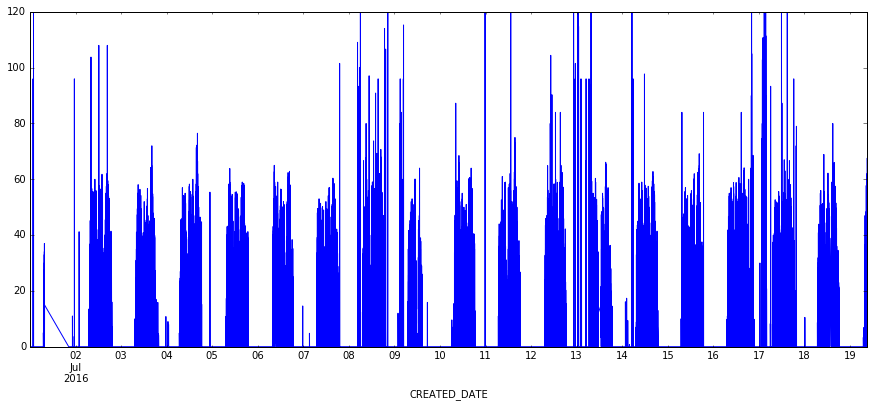

In [21]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
res.plot()
pyplot.show()

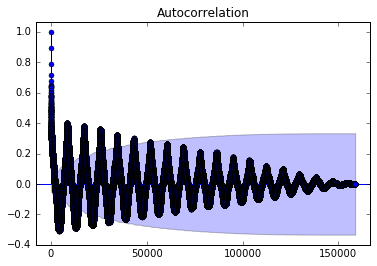

In [22]:
%matplotlib inline
plot_acf(res)
pyplot.show()

above is a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1.

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

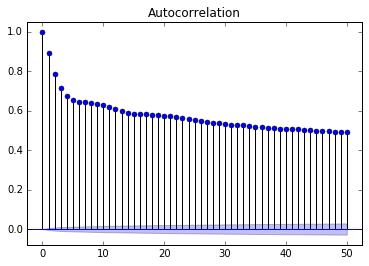

In [23]:
plot_acf(res,lags=50)

pyplot.show()

Above is ACF graph with lag 50

Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

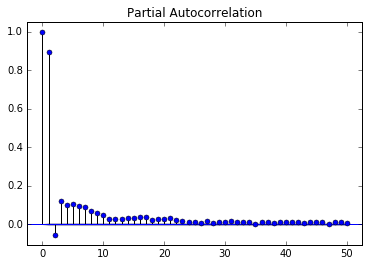

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(res, lags=50)
pyplot.show()

**Checking Stationarity**
So, more formally, we can check stationarity using the following:

**Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

**Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

In [9]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [34]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries,window=12)
    rolstd = pd.rolling_std(timeseries,window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


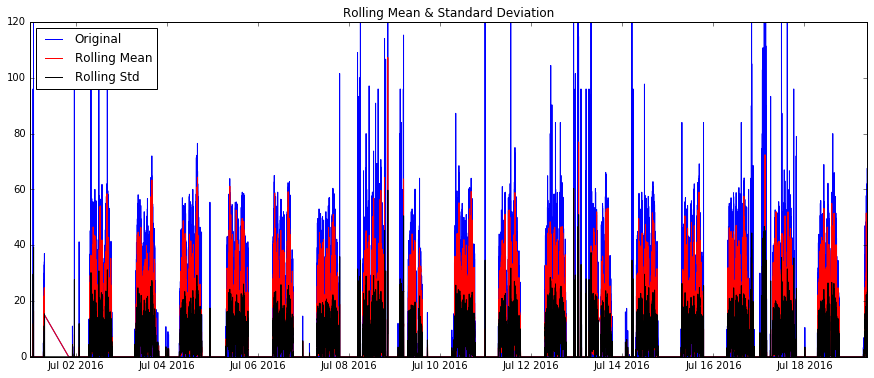

Results of Dickey-Fuller Test:


In [ ]:
test_stationarity(res)

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

**Estimating & Eliminating Trend**

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:



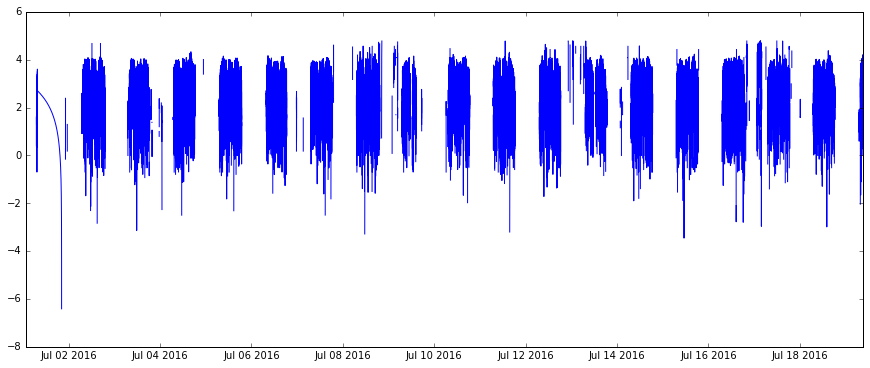

In [31]:
import numpy as np
ts_log = np.log(res)
plt.plot(ts_log)

**Moving average**

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.



/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


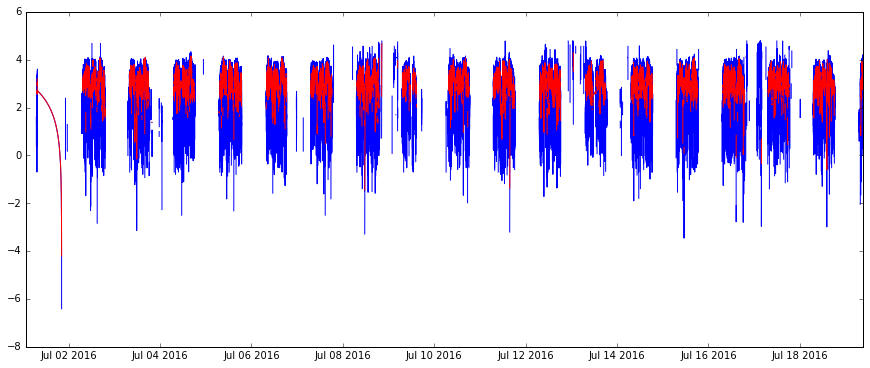

In [12]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

    Differencing – taking the differece with a particular time lag
    Decomposition – modeling both trend and seasonality and removing them from the model.

Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

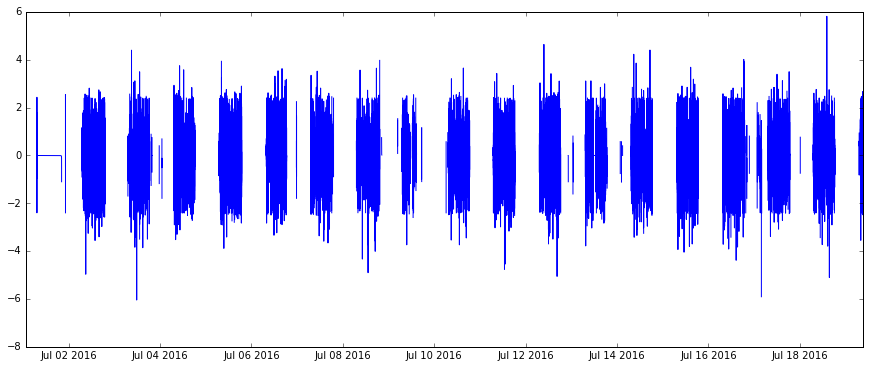

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()
/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


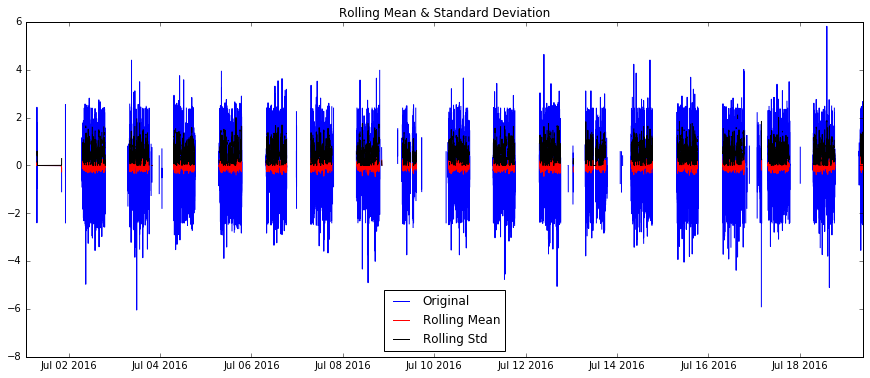

In [14]:
ts_log_diff.dropna(inplace=True)
#Determing rolling statistics
rolmean = pd.rolling_mean(ts_log_diff,window=12)
rolstd = pd.rolling_std(ts_log_diff,window=12)

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Decomposing**

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:



In [24]:
res.values

array([  0.  ,   0.  ,   0.  , ...,  51.28,  54.48,  57.68])

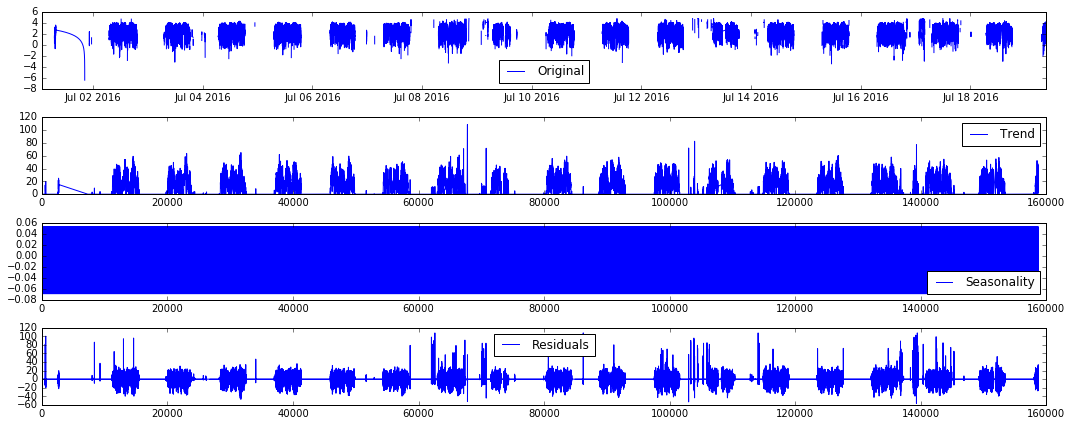

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(res.values,freq=10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/home/kanika/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


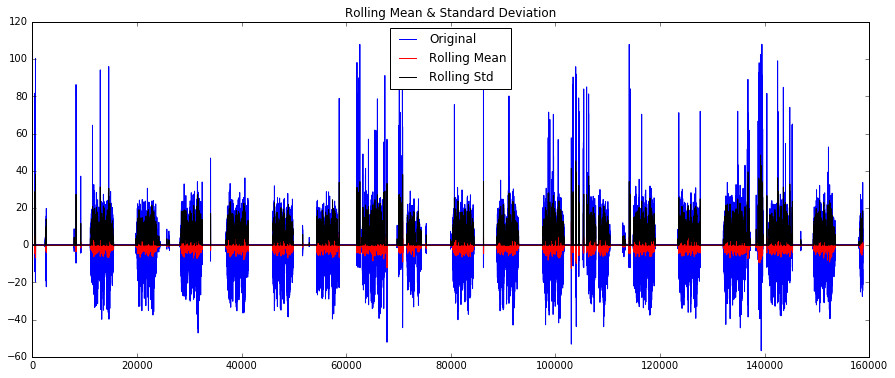

Results of Dickey-Fuller Test:


ValueError: too many values to unpack

In [35]:
ts_log_decompose = pd.DataFrame(residual)
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

**Number of AR (Auto-Regressive) terms (p):** AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
**Number of MA (Moving Average) terms (q):** MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

**Number of Differences (d):** These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

**Autocorrelation Function (ACF):** It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

**Partial Autocorrelation Function (PACF):** This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [37]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(res, nlags=50)
lag_pacf = pacf(res, nlags=50, method='ols')

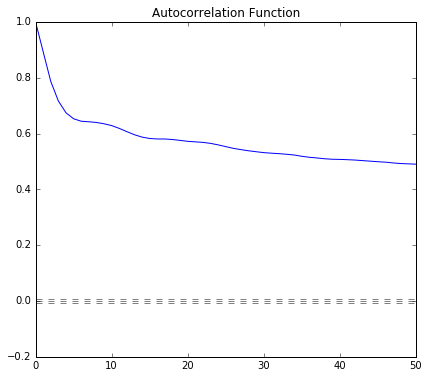

In [38]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

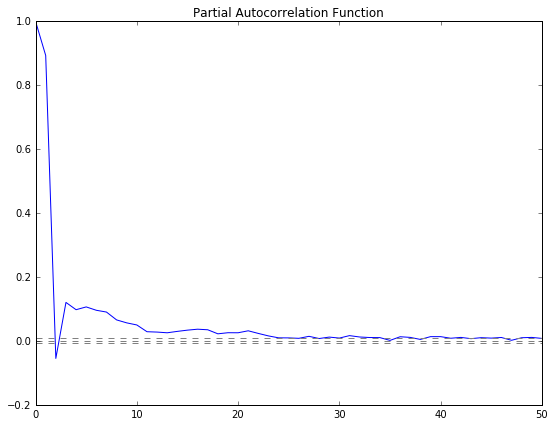

In [39]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [28]:
ts=pd.Series(ts).round(0).astype(int)

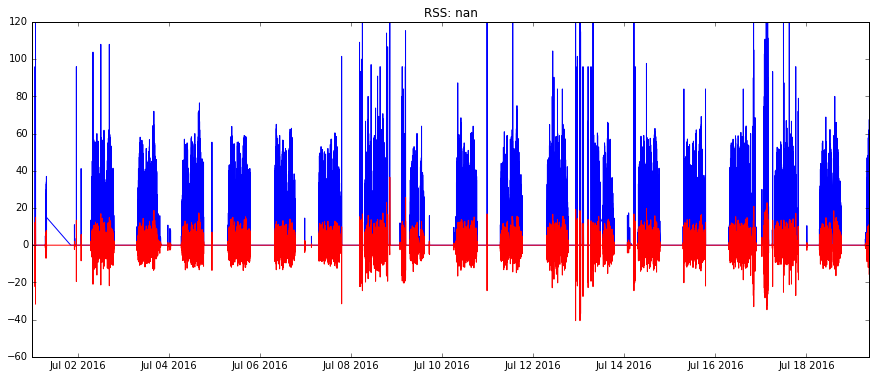

In [49]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(res, order=(0, 1, 3))  
results_MA = model.fit(disp=-1)  
plt.plot(res)
#results_MA.fittedvalues
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-res)**2))

In [50]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

CREATED_DATE
2016-07-01 00:10:10    0.000282
2016-07-01 00:10:20    0.000286
2016-07-01 00:10:30    0.000356
2016-07-01 00:10:40    0.000435
2016-07-01 00:10:50    0.000473
Freq: 10S, dtype: float64


In [51]:
type(predictions_ARIMA_diff)

pandas.core.series.Series

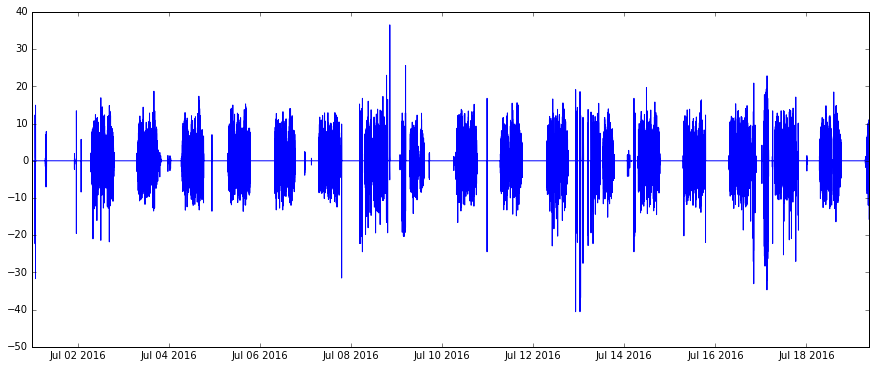

In [52]:
plt.plot(predictions_ARIMA_diff)

In [53]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

CREATED_DATE
2016-07-01 00:10:10    0.000282
2016-07-01 00:10:20    0.000568
2016-07-01 00:10:30    0.000924
2016-07-01 00:10:40    0.001359
2016-07-01 00:10:50    0.001832
Freq: 10S, dtype: float64


In [55]:
predictions_ARIMA_log = pd.Series(res.ix[0], index=res.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

CREATED_DATE
2016-07-01 00:10:00    0.000000
2016-07-01 00:10:10    0.000282
2016-07-01 00:10:20    0.000568
2016-07-01 00:10:30    0.000924
2016-07-01 00:10:40    0.001359
Freq: 10S, dtype: float64

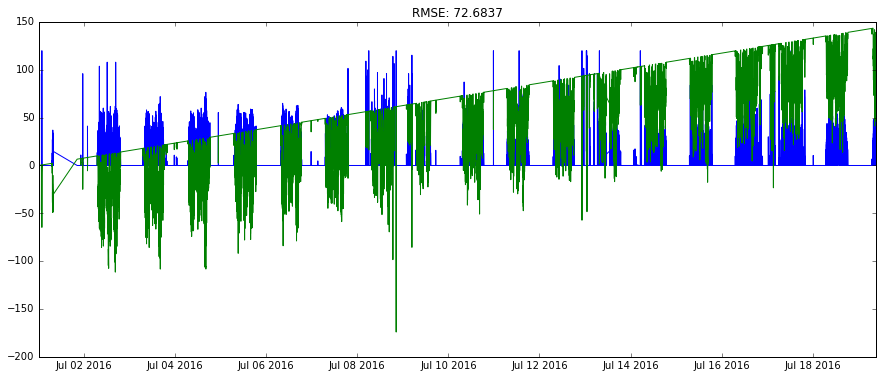

In [63]:
#predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(res)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_log-res)**2)/len(res)))